# Importing the libraries

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Data Loading 

In [2]:
df = pd.read_csv("day.csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
df.shape

(730, 16)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

# Data Pre-processing

Common Functions

In [6]:
def season_map(x):
    return x.map({
        1: "spring",
        2: "summer",
        3: "fall",
        4: "winter"
    })

def weekday_map(x):
    return x.map({
        1: "Monday",
        2: "Tuesday",
        3: "Wednesday",
        4: "Thursday",
        5: "Friday",
        6: "Saturday",
        0: "Sunday"
    })

def weathersit_map(x):
     return x.map({
        1: "GOOD",
        2: "NORMAL",
        3: "BAD",
        4: "WORSE"
     })
    

def model(X,y):
    X=sm.add_constant(X)
    lm_model=sm.OLS(y,X).fit()
    print(lm_model.summary())
    return X


def VIF(X):
    vif=pd.DataFrame()
    vif['Features']=X.columns
    vif['VIF']=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF']=round(vif['VIF'],2)
    vif=vif.sort_values(by='VIF', ascending=False)
    return vif

1. Dropping the instant column because its a id column
2. Dropping the dteday column because year, month ,day have seperate column

In [7]:
df=df.drop(["instant","dteday"],axis=1)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Converting into proper values

In [8]:
df[["season"]]=df[["season"]].apply(season_map)
df[["weekday"]]=df[["weekday"]].apply(weekday_map)
df[["weathersit"]]=df[["weathersit"]].apply(weathersit_map)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,spring,0,1,0,Saturday,0,NORMAL,14.110847,18.18125,80.5833,10.749882,331,654,985
1,spring,0,1,0,Sunday,0,NORMAL,14.902598,17.68695,69.6087,16.652113,131,670,801
2,spring,0,1,0,Monday,1,GOOD,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,spring,0,1,0,Tuesday,1,GOOD,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,spring,0,1,0,Wednesday,1,GOOD,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## Visualising Categorical Variables

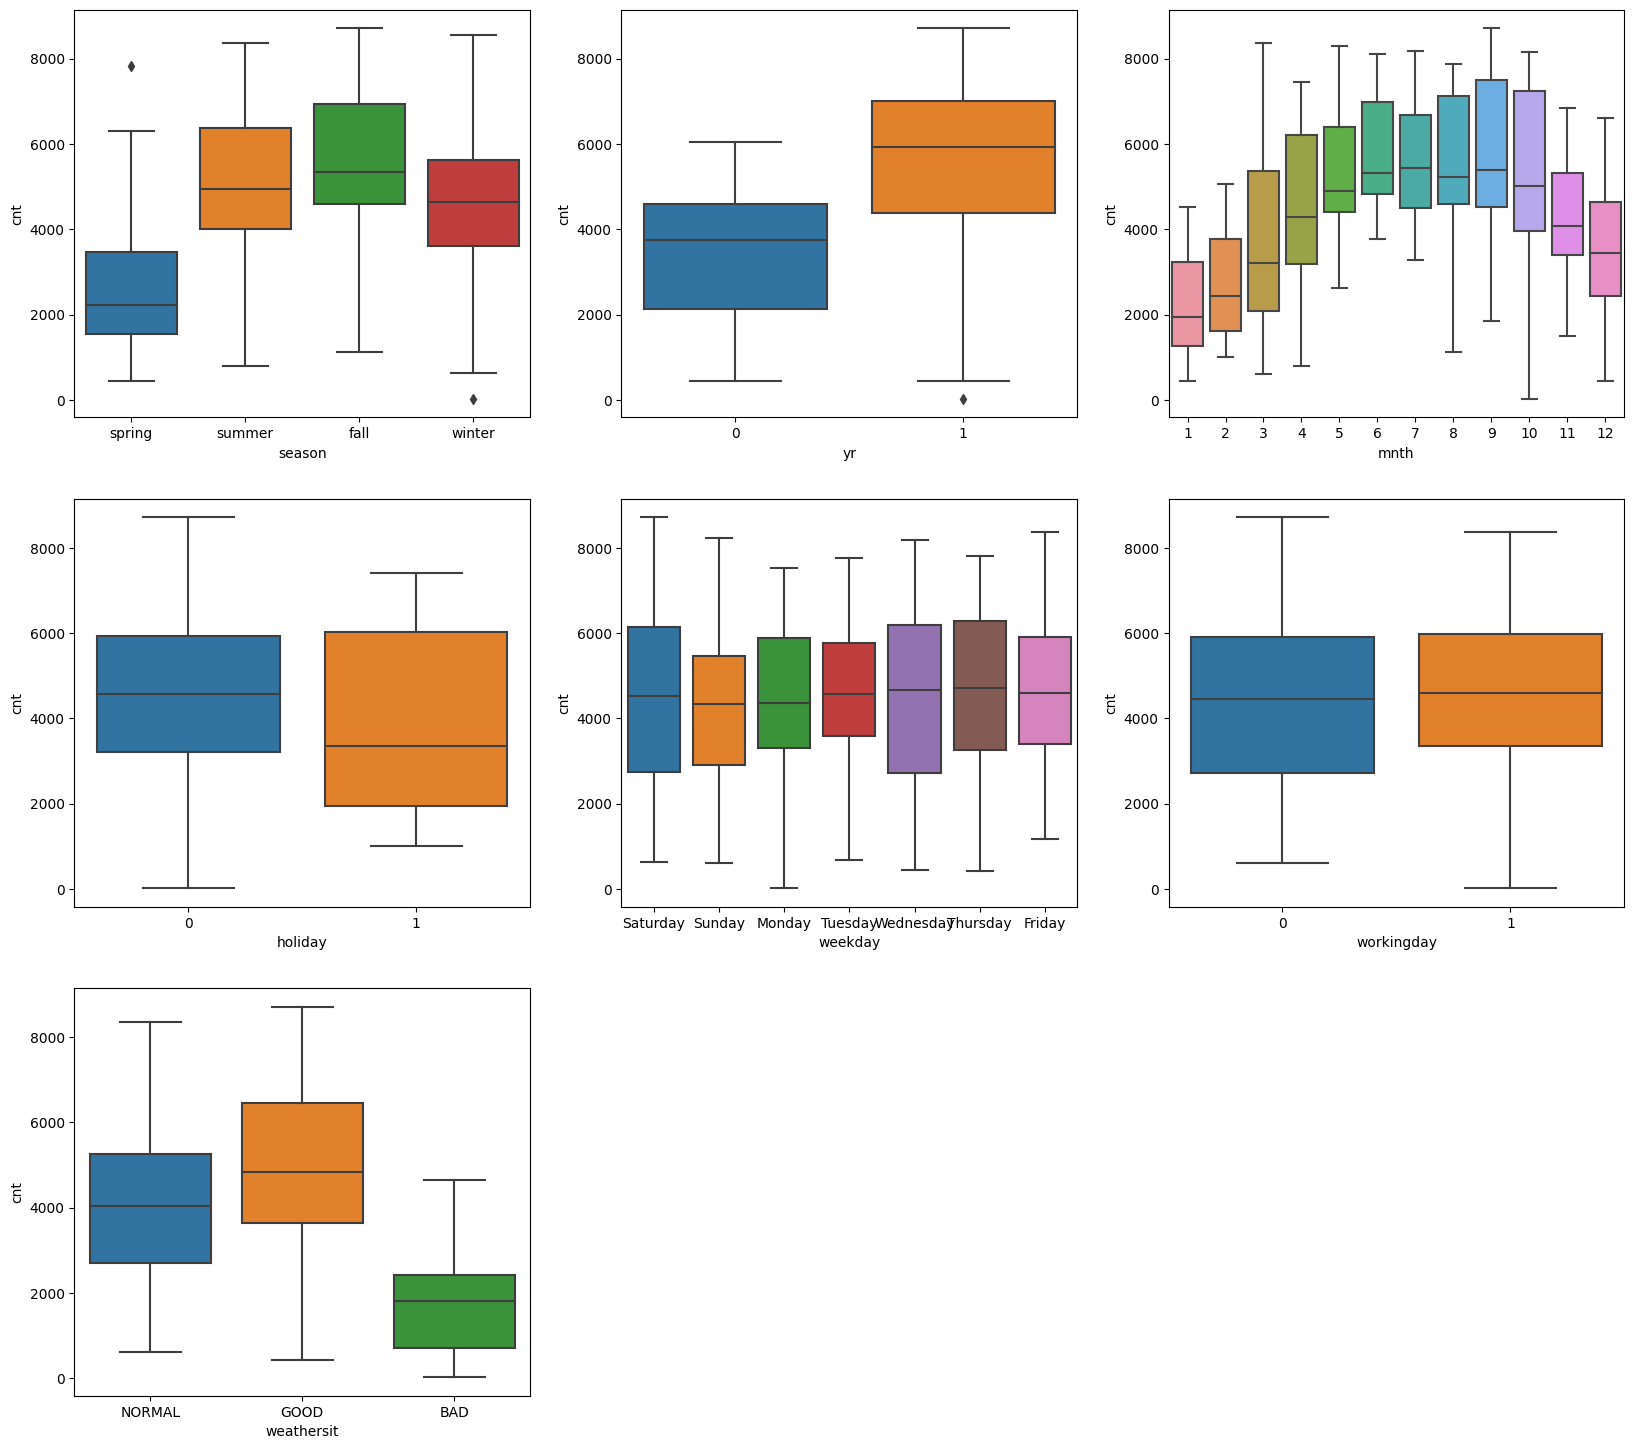

In [9]:
plt.figure(figsize=(20,18))
plt.subplot(3,3,1)
sns.boxplot(data=df,x="season",y="cnt")
plt.subplot(3,3,2)
sns.boxplot(data=df,x="yr",y="cnt")
plt.subplot(3,3,3)
sns.boxplot(data=df,x="mnth",y="cnt")
plt.subplot(3,3,4)
sns.boxplot(data=df,x="holiday",y="cnt")
plt.subplot(3,3,5)
sns.boxplot(data=df,x="weekday",y="cnt")
plt.subplot(3,3,6)
sns.boxplot(data=df,x="workingday",y="cnt")
plt.subplot(3,3,7)
sns.boxplot(data=df,x="weathersit",y="cnt")
plt.show()

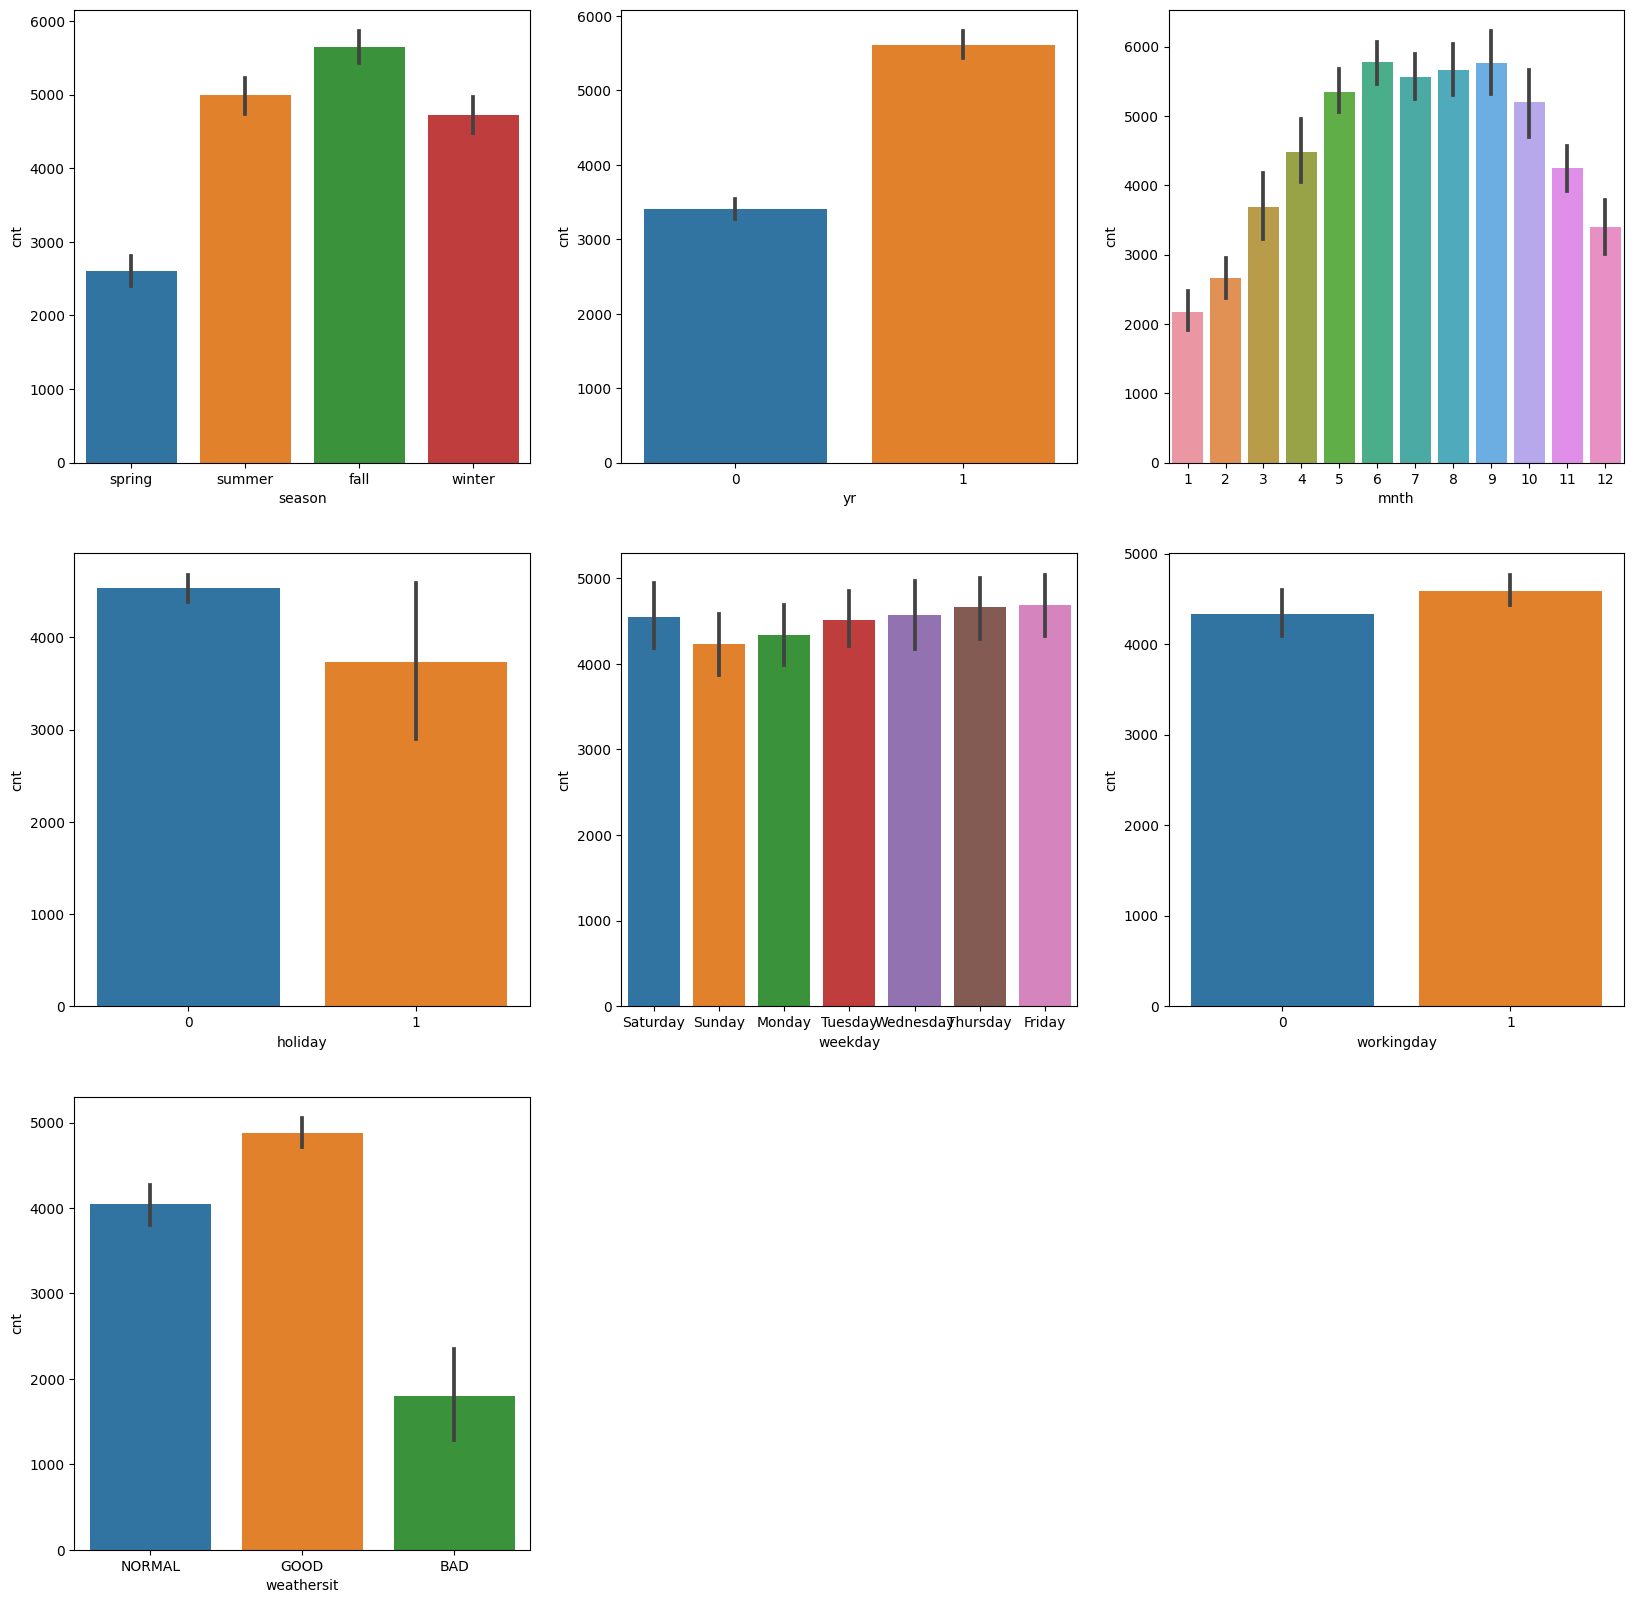

In [10]:
plt.figure(figsize=(20,20))
plt.subplot(3,3,1)
sns.barplot(data=df,x="season",y="cnt")
plt.subplot(3,3,2)
sns.barplot(data=df,x="yr",y="cnt")
plt.subplot(3,3,3)
sns.barplot(data=df,x="mnth",y="cnt")
plt.subplot(3,3,4)
sns.barplot(data=df,x="holiday",y="cnt")
plt.subplot(3,3,5)
sns.barplot(data=df,x="weekday",y="cnt")
plt.subplot(3,3,6)
sns.barplot(data=df,x="workingday",y="cnt")
plt.subplot(3,3,7)
sns.barplot(data=df,x="weathersit",y="cnt")
plt.show()

- **Bike Rentals by Season:**
  - Most bike rentals occurred in the fall season.
  - Summer rentals were the second-highest, followed by winter, while spring had the fewest rentals.

- **Weather Conditions and Bike Rentals:**
  - Bike rentals were higher during clear weather conditions, indicating a preference for good weather.
  - Normal weather conditions followed in popularity, while bad weather conditions resulted in a drop in rentals.
  - There were no rentals during the worst weather conditions.

## Visualising Numerical Variables

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  casual      730 non-null    int64  
 12  registered  730 non-null    int64  
 13  cnt         730 non-null    int64  
dtypes: float64(4), int64(7), object(3)
memory usage: 80.0+ KB


In [12]:
num_var=[ 'temp', 'atemp', 'hum','windspeed', 'casual', 'registered', 'cnt']

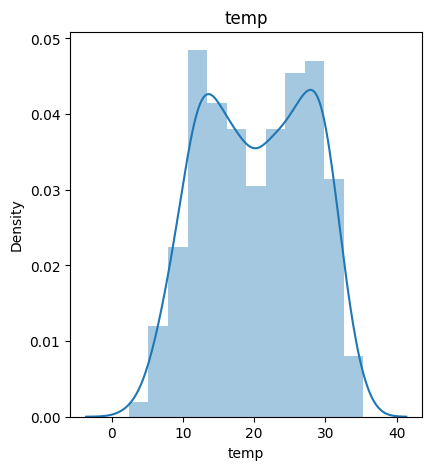

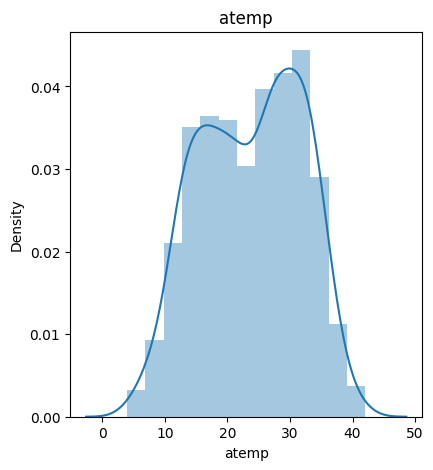

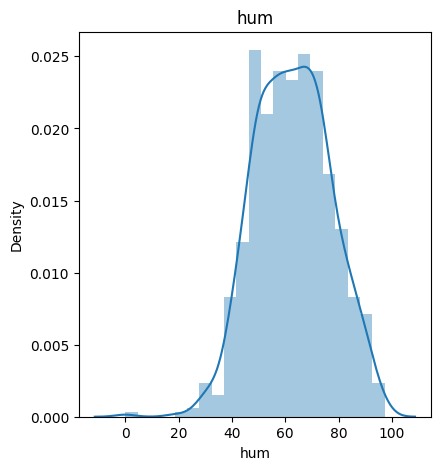

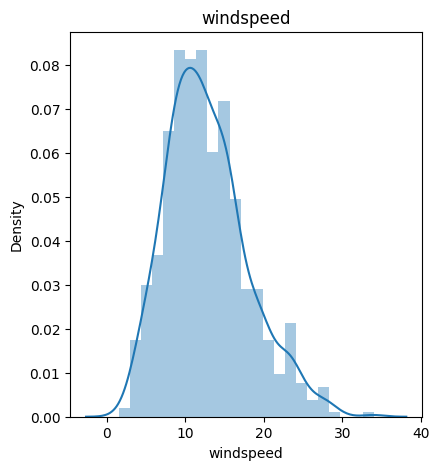

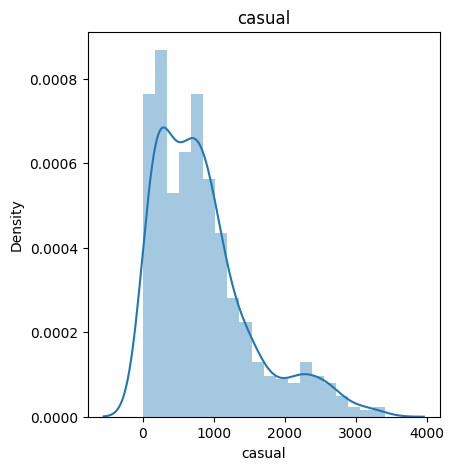

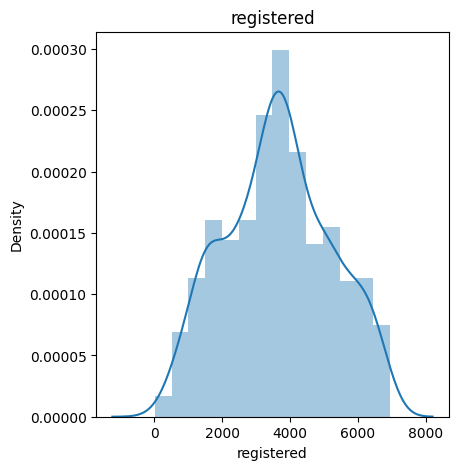

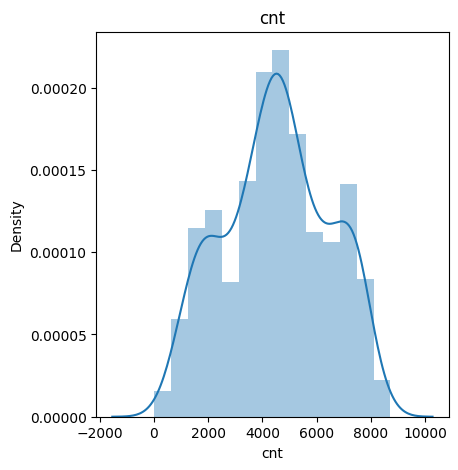

In [13]:
for column in num_var:
    plt.figure(figsize=(10,5))
    plt.subplot(121)
    sns.distplot(df[column])
    plt.title(column)

- Values of temperature and feeling temperature are differently distributed.

- Humidity is almost randomly distributed with a mean of around 61-63.

- The spread of casual users is not normally distributed, whereas that of registered users is normally distributed, ultimately leading to `cnt` (count) being spread normally distributed.


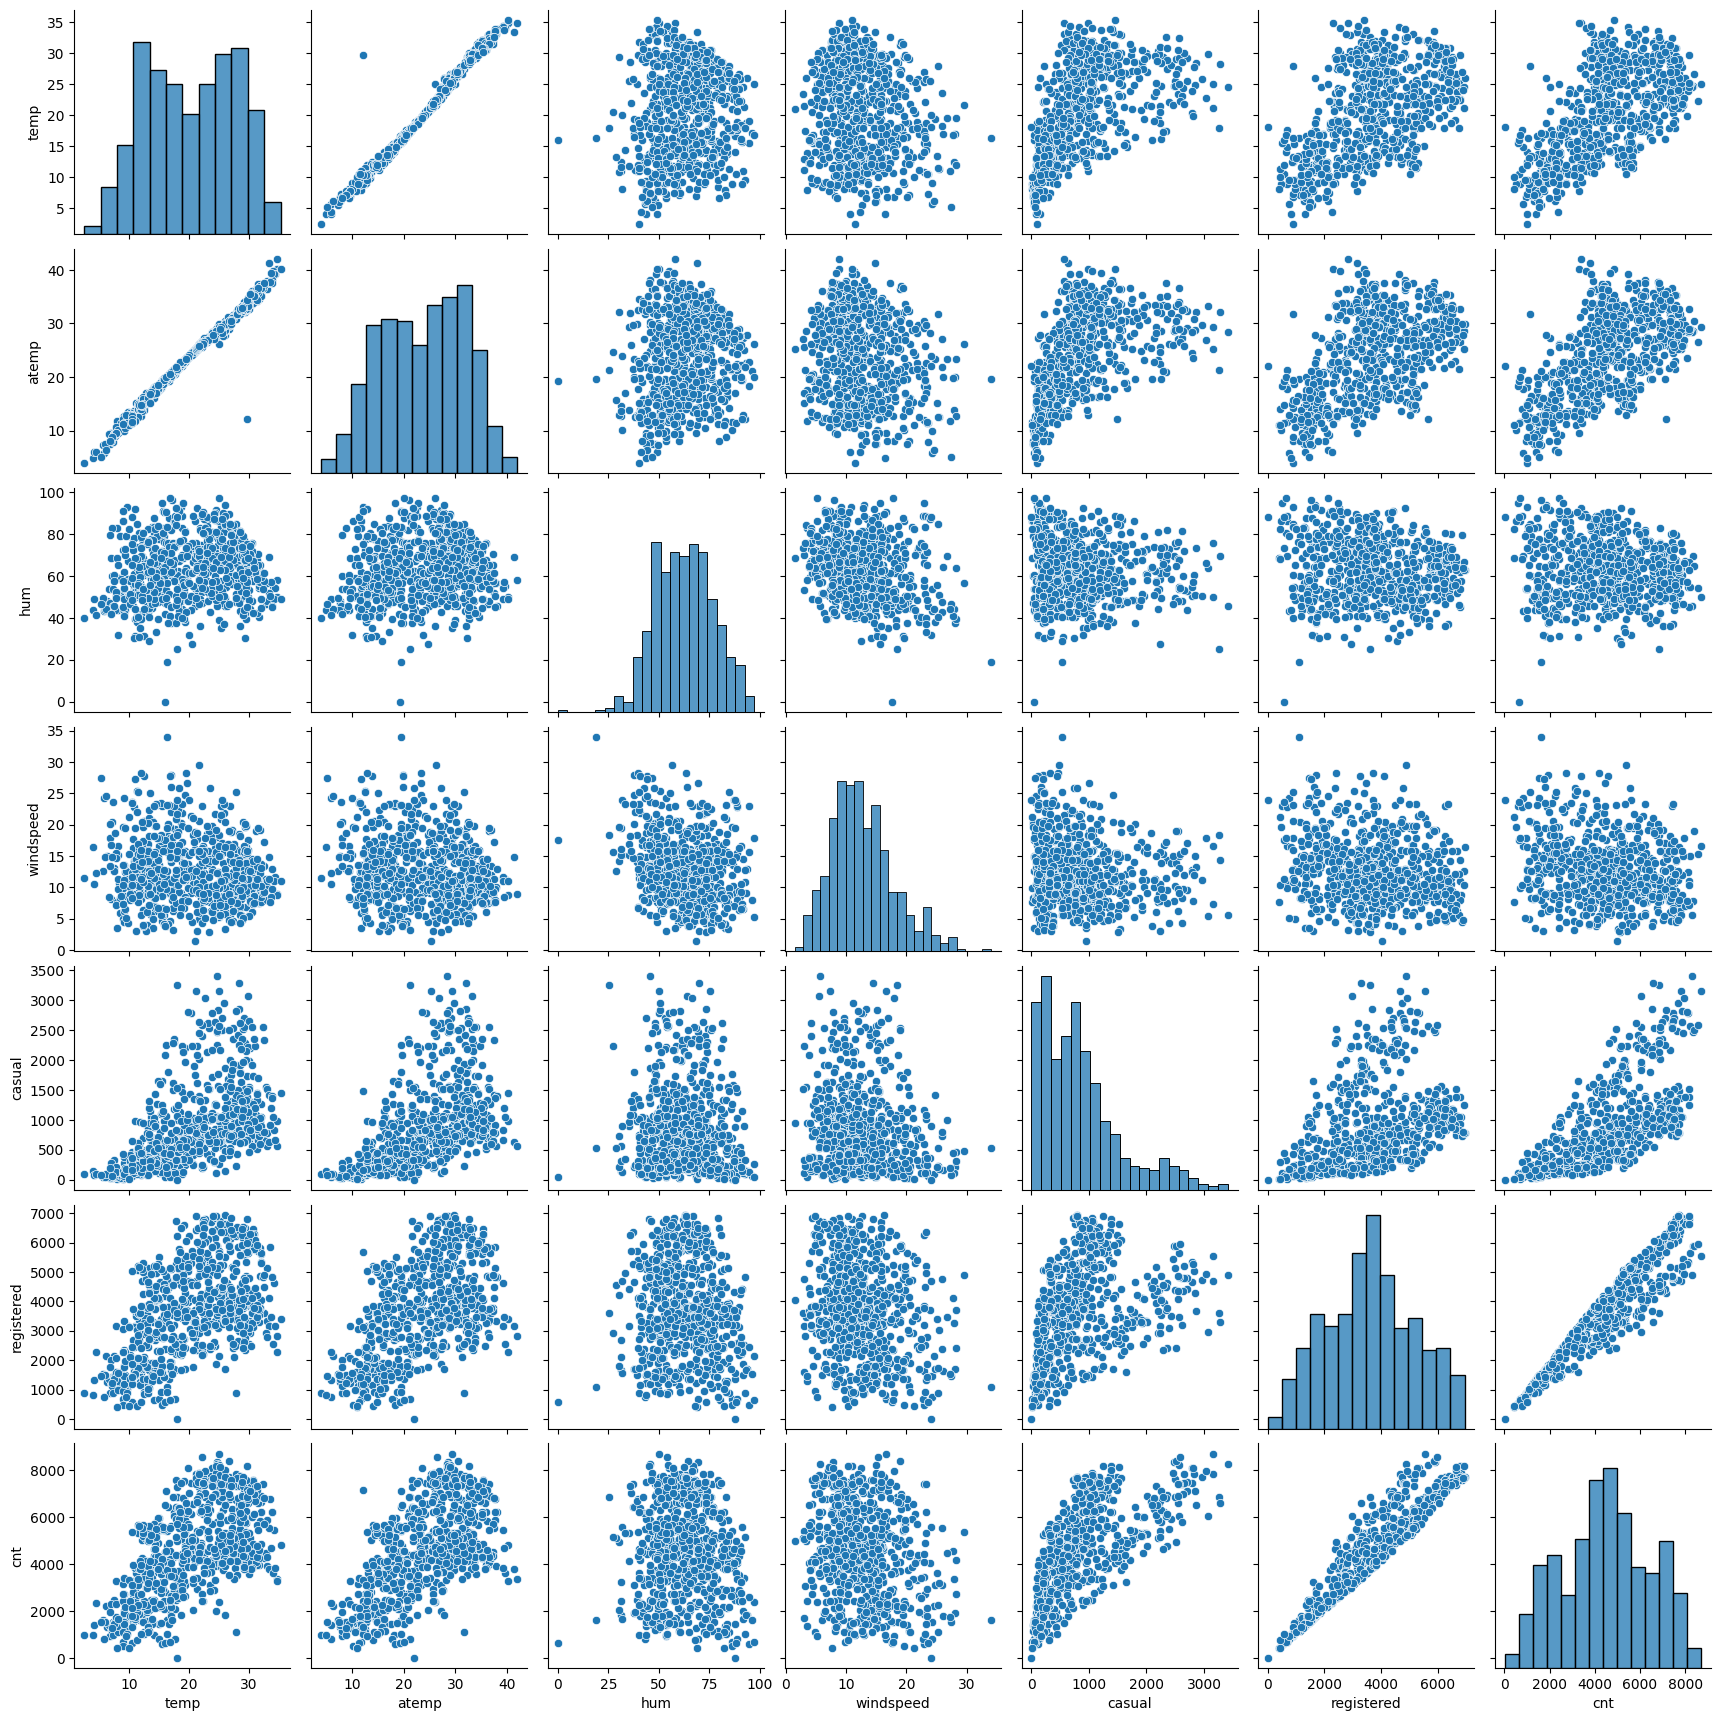

In [14]:
sns.pairplot(df[num_var])

- Temp and atemp are highly correlated, so we will be using only one of the variables.

- Registered and atemp show a strong correlation with the count.

<Axes: >

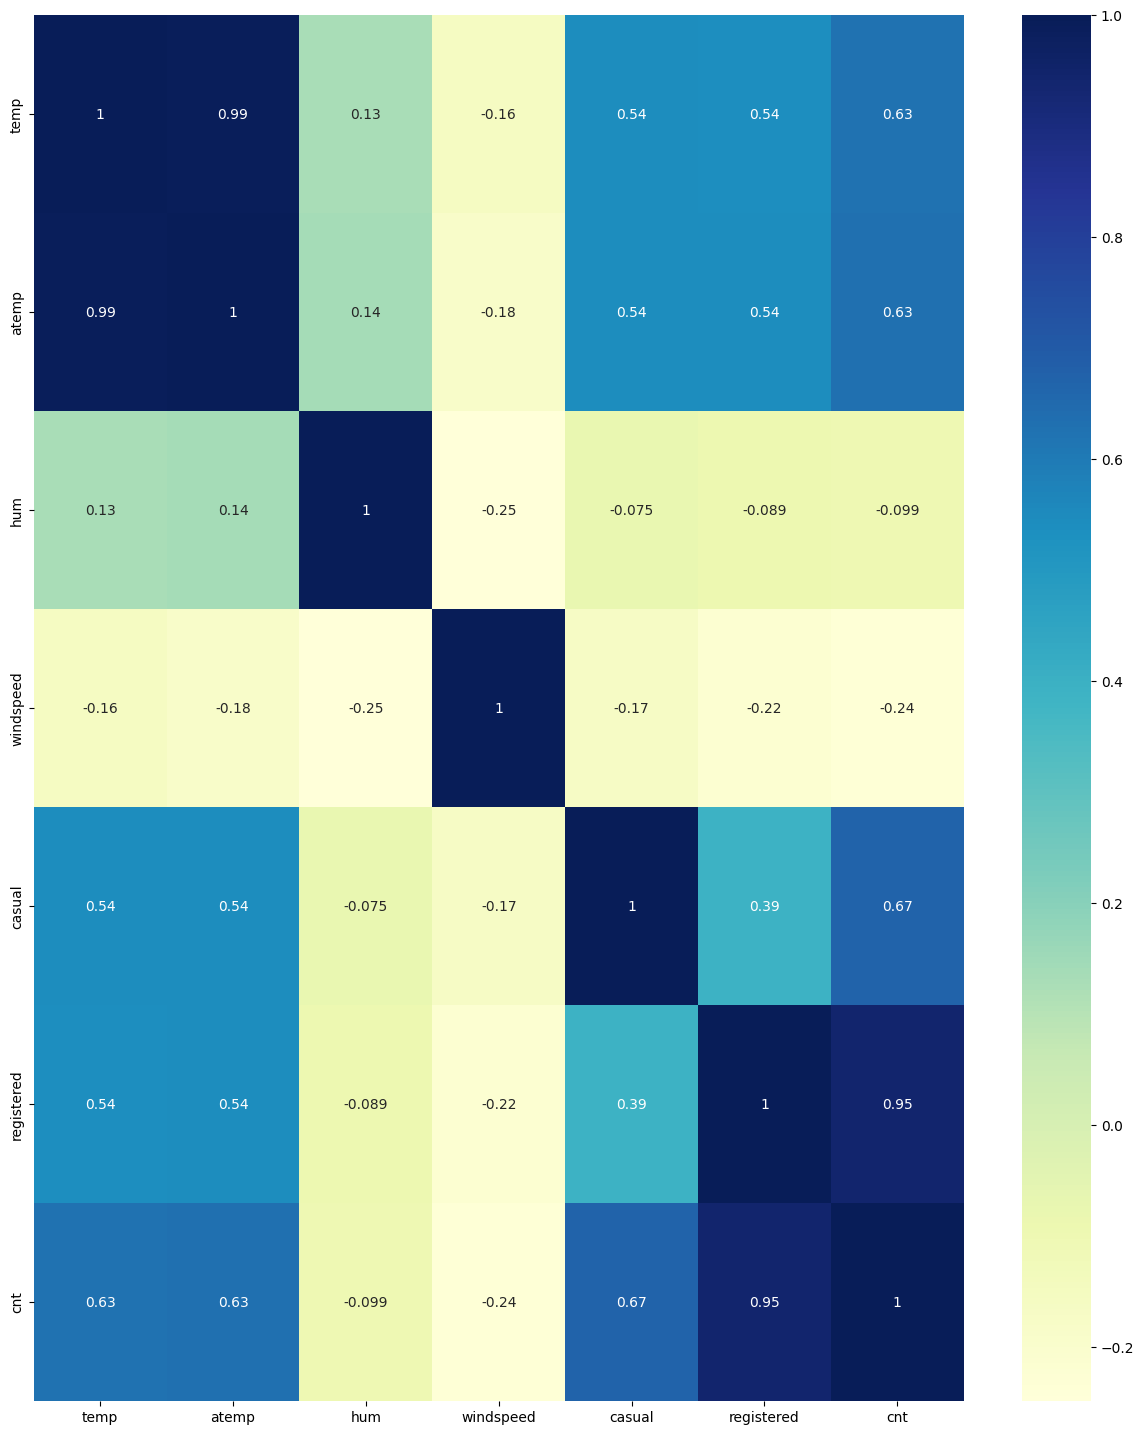

In [15]:
plt.figure(figsize=(15,18))
sns.heatmap(df[num_var].corr(),annot=True,cmap="YlGnBu")

- Registered is highly correlated with count.

- Casual, temp, and atemp are also decently correlated with count.

Dropping registered and casual column.

In [16]:
df.drop(['casual','registered'],axis=1,inplace=True)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,Saturday,0,NORMAL,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,Sunday,0,NORMAL,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,Monday,1,GOOD,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,Tuesday,1,GOOD,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,Wednesday,1,GOOD,9.305237,11.46350,43.6957,12.522300,1600


temp and atemp are highly correlated . So, dropping atemp column

In [17]:
df.drop(["atemp"],axis=1,inplace=True)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,1,0,Saturday,0,NORMAL,14.110847,80.5833,10.749882,985
1,spring,0,1,0,Sunday,0,NORMAL,14.902598,69.6087,16.652113,801
2,spring,0,1,0,Monday,1,GOOD,8.050924,43.7273,16.636703,1349
3,spring,0,1,0,Tuesday,1,GOOD,8.200000,59.0435,10.739832,1562
4,spring,0,1,0,Wednesday,1,GOOD,9.305237,43.6957,12.522300,1600


## Data Preparation for modeling

In [18]:
seasons= pd.get_dummies(df["season"],drop_first=True,dtype=float)
weekdays= pd.get_dummies(df["weekday"], drop_first=True,dtype=float)
weathersits= pd.get_dummies(df["weathersit"],drop_first=True,dtype=float)

In [19]:
df=pd.concat([df,seasons,weekdays,weathersits],axis=1)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,...,summer,winter,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,GOOD,NORMAL
0,spring,0,1,0,Saturday,0,NORMAL,14.110847,80.5833,10.749882,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,spring,0,1,0,Sunday,0,NORMAL,14.902598,69.6087,16.652113,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,spring,0,1,0,Monday,1,GOOD,8.050924,43.7273,16.636703,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,spring,0,1,0,Tuesday,1,GOOD,8.200000,59.0435,10.739832,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,spring,0,1,0,Wednesday,1,GOOD,9.305237,43.6957,12.522300,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [20]:
df.drop(['season','weekday','weathersit'],axis=1,inplace=True)
df.head()

,yr,mnth,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,GOOD,NORMAL
0,0,1,0,0,14.110847,80.5833,10.749882,985,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,1,0,0,14.902598,69.6087,16.652113,801,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0,1,0,1,8.050924,43.7273,16.636703,1349,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0,1,0,1,8.200000,59.0435,10.739832,1562,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0,1,0,1,9.305237,43.6957,12.522300,1600,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


## Data Spliting for training and testing

In [21]:
import sklearn
from sklearn.model_selection import train_test_split
df_train,df_test= train_test_split(df,train_size=.7,random_state=100)
print(df_train.shape)
print(df_test.shape)

(510, 19)
(220, 19)


## Scaling

In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaling_var= ['temp','hum','windspeed','cnt']
df_train[scaling_var]= scaler.fit_transform(df_train[scaling_var])
df_train.describe()

,yr,mnth,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,GOOD,NORMAL
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,6.541176,0.025490,0.676471,0.537440,0.650480,0.320883,0.513499,0.243137,0.247059,0.247059,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.625490,0.345098
std,0.500429,3.465416,0.157763,0.468282,0.225858,0.145846,0.169803,0.224421,0.429398,0.431725,0.431725,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.484471,0.475867
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,3.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,7.000000,0.000000,1.000000,0.542596,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,10.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,12.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Preparing X and y variables

In [23]:
y_train=df_train.pop("cnt")

X_train=df_train

# Model Building

In [24]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [25]:

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

lm=LinearRegression()
lm.fit(X_train,y_train)

rfe=RFE(lm, n_features_to_select=15)
rfe=rfe.fit(X_train,y_train)

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('mnth', False, 4),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Monday', True, 1),
 ('Saturday', True, 1),
 ('Sunday', True, 1),
 ('Thursday', False, 2),
 ('Tuesday', True, 1),
 ('Wednesday', False, 3),
 ('GOOD', True, 1),
 ('NORMAL', True, 1)]

In [26]:
col= X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'Monday', 'Saturday', 'Sunday', 'Tuesday', 'GOOD',
       'NORMAL'],
      dtype='object')

In [27]:
X_train.columns[~rfe.support_]

Index(['mnth', 'Thursday', 'Wednesday'], dtype='object')

In [28]:
X_train_rfe=X_train[X_train.columns[rfe.support_]]
X_train_rfe.head()

,yr,holiday,workingday,temp,hum,windspeed,spring,summer,winter,Monday,Saturday,Sunday,Tuesday,GOOD,NORMAL
576,1,0,1,0.815169,0.725633,0.264686,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
426,1,0,0,0.442393,0.640189,0.255342,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
728,1,0,0,0.245101,0.498067,0.663106,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
482,1,0,0,0.395666,0.504508,0.188475,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
111,0,0,1,0.345824,0.751824,0.380981,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## 1st Model

In [29]:
X_train1=model(X_train_rfe,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     177.1
Date:                Wed, 13 Dec 2023   Prob (F-statistic):          2.12e-182
Time:                        20:10:02   Log-Likelihood:                 496.16
No. Observations:                 510   AIC:                            -962.3
Df Residuals:                     495   BIC:                            -898.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0102      0.039      0.261      0.7

In [30]:
VIF(X_train1)

,Features,VIF
2,holiday,inf
3,workingday,inf
11,Saturday,inf
12,Sunday,inf
14,GOOD,10.27
15,NORMAL,8.87
7,spring,4.55
4,temp,3.51
9,winter,3.10
8,summer,2.07


In [31]:
#The VIF of working day is very high . So we will be dropping this column.
X_train1=X_train1.drop('workingday',axis=1)

## 2nd Model

In [32]:
X_train1 = model(X_train1,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     177.1
Date:                Wed, 13 Dec 2023   Prob (F-statistic):          2.12e-182
Time:                        20:10:02   Log-Likelihood:                 496.16
No. Observations:                 510   AIC:                            -962.3
Df Residuals:                     495   BIC:                            -898.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0465      0.048      0.963      0.3

In [33]:
VIF(X_train1)

,Features,VIF
0,const,137.54
13,GOOD,10.27
14,NORMAL,8.87
6,spring,4.55
3,temp,3.51
8,winter,3.10
7,summer,2.07
4,hum,1.88
9,Monday,1.24
5,windspeed,1.20


## 3rd Model

In [34]:
X_train1=model(X_train1,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     177.1
Date:                Wed, 13 Dec 2023   Prob (F-statistic):          2.12e-182
Time:                        20:10:02   Log-Likelihood:                 496.16
No. Observations:                 510   AIC:                            -962.3
Df Residuals:                     495   BIC:                            -898.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0465      0.048      0.963      0.3

In [35]:
VIF(X_train1)

,Features,VIF
0,const,137.54
13,GOOD,10.27
14,NORMAL,8.87
6,spring,4.55
3,temp,3.51
8,winter,3.10
7,summer,2.07
4,hum,1.88
9,Monday,1.24
5,windspeed,1.20


## 4th Model

In [36]:
X_train1 = model(X_train1,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     177.1
Date:                Wed, 13 Dec 2023   Prob (F-statistic):          2.12e-182
Time:                        20:10:02   Log-Likelihood:                 496.16
No. Observations:                 510   AIC:                            -962.3
Df Residuals:                     495   BIC:                            -898.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0465      0.048      0.963      0.3

In [37]:
VIF(X_train1)

,Features,VIF
0,const,137.54
13,GOOD,10.27
14,NORMAL,8.87
6,spring,4.55
3,temp,3.51
8,winter,3.10
7,summer,2.07
4,hum,1.88
9,Monday,1.24
5,windspeed,1.20


In [38]:
X_train1 = X_train1.drop('GOOD',axis=1)

## 5th Model

In [39]:
X_train1 = model(X_train1,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     157.6
Date:                Wed, 13 Dec 2023   Prob (F-statistic):          1.25e-166
Time:                        20:10:02   Log-Likelihood:                 455.90
No. Observations:                 510   AIC:                            -883.8
Df Residuals:                     496   BIC:                            -824.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3542      0.038      9.438      0.0

In [40]:
VIF(X_train1)

,Features,VIF
0,const,71.32
6,spring,4.52
3,temp,3.46
8,winter,3.09
7,summer,2.06
4,hum,1.58
13,NORMAL,1.40
9,Monday,1.24
10,Saturday,1.17
11,Sunday,1.16


In [41]:
X_train1 = X_train1.drop('spring',axis=1)

## 6th Model

In [42]:
X_train1 = model(X_train1,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     168.0
Date:                Wed, 13 Dec 2023   Prob (F-statistic):          3.32e-166
Time:                        20:10:03   Log-Likelihood:                 452.22
No. Observations:                 510   AIC:                            -878.4
Df Residuals:                     497   BIC:                            -823.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2895      0.029      9.998      0.0

In [43]:
VIF(X_train1)

,Features,VIF
0,const,41.93
4,hum,1.57
12,NORMAL,1.39
7,winter,1.25
8,Monday,1.24
3,temp,1.22
9,Saturday,1.17
10,Sunday,1.16
6,summer,1.15
11,Tuesday,1.14


## 7th Model

In [44]:
X_train1 = X_train1.drop('Saturday',axis=1)
X_train1 = model(X_train1,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     183.7
Date:                Wed, 13 Dec 2023   Prob (F-statistic):          2.48e-167
Time:                        20:10:03   Log-Likelihood:                 452.18
No. Observations:                 510   AIC:                            -880.4
Df Residuals:                     498   BIC:                            -829.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2906      0.029     10.147      0.0

In [45]:
VIF(X_train1)

,Features,VIF
0,const,41.09
4,hum,1.57
11,NORMAL,1.39
7,winter,1.25
3,temp,1.22
8,Monday,1.16
6,summer,1.15
5,windspeed,1.13
2,holiday,1.10
9,Sunday,1.08


## 8th Model

In [46]:
X_train1 = X_train1.drop('Tuesday',axis=1)
X_train1 = model(X_train1,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     202.2
Date:                Wed, 13 Dec 2023   Prob (F-statistic):          2.23e-168
Time:                        20:10:03   Log-Likelihood:                 451.90
No. Observations:                 510   AIC:                            -881.8
Df Residuals:                     499   BIC:                            -835.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2893      0.029     10.126      0.0

In [47]:
VIF(X_train1)

,Features,VIF
0,const,40.94
4,hum,1.57
10,NORMAL,1.39
7,winter,1.25
3,temp,1.22
6,summer,1.14
5,windspeed,1.13
8,Monday,1.12
2,holiday,1.10
9,Sunday,1.04


## 9th Model

In [48]:
X_train1 = X_train1.drop('Monday',axis=1)
X_train1 = model(X_train1,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     224.6
Date:                Wed, 13 Dec 2023   Prob (F-statistic):          2.24e-169
Time:                        20:10:03   Log-Likelihood:                 451.45
No. Observations:                 510   AIC:                            -882.9
Df Residuals:                     500   BIC:                            -840.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2883      0.029     10.098      0.0

In [49]:
VIF(X_train1)

,Features,VIF
0,const,40.88
4,hum,1.57
9,NORMAL,1.39
7,winter,1.25
3,temp,1.22
6,summer,1.14
5,windspeed,1.13
1,yr,1.03
2,holiday,1.02
8,Sunday,1.01


## 4th and 9th model are best fit

In [50]:
lm_model9=sm.OLS(y_train,X_train1).fit()
y_train_pred9=lm_model9.predict(X_train1)

Text(0.5, 0, 'Errors')

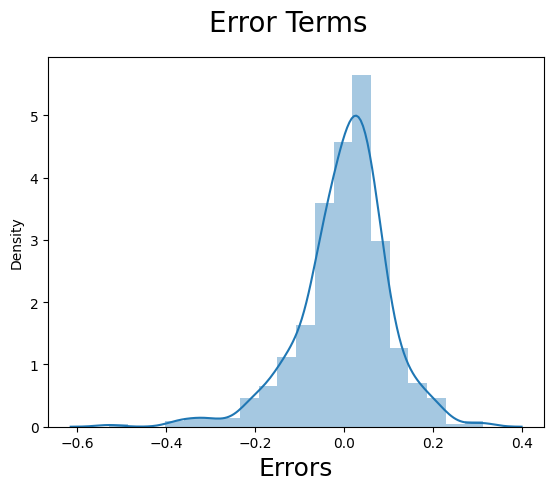

In [51]:
fig = plt.figure()
sns.distplot((y_train - y_train_pred9), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)

In [52]:
#Rebuilding the fourth model
X_train_rfe=sm.add_constant(X_train_rfe)
X_train_rfe.head()

,const,yr,holiday,workingday,temp,hum,windspeed,spring,summer,winter,Monday,Saturday,Sunday,Tuesday,GOOD,NORMAL
576,1.0,1,0,1,0.815169,0.725633,0.264686,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
426,1.0,1,0,0,0.442393,0.640189,0.255342,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
728,1.0,1,0,0,0.245101,0.498067,0.663106,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
482,1.0,1,0,0,0.395666,0.504508,0.188475,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
111,1.0,0,0,1,0.345824,0.751824,0.380981,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [53]:
X_train_rfe.columns

Index(['const', 'yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'spring', 'summer', 'winter', 'Monday', 'Saturday', 'Sunday', 'Tuesday',
       'GOOD', 'NORMAL'],
      dtype='object')

In [54]:
X_train_rfe.drop(['workingday','Saturday','Sunday'],axis=1,inplace=True)

Columns of X_train_rfe are similar to the fourth model

In [55]:
lm_model4=sm.OLS(y_train,X_train_rfe).fit()
y_train_pred4=lm_model4.predict(X_train_rfe)

Text(0.5, 0, 'Errors')

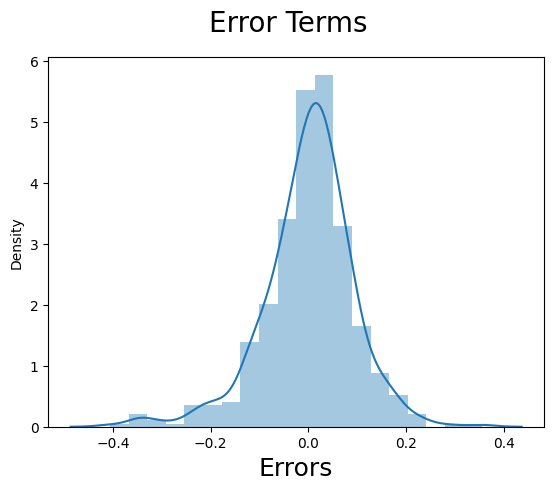

In [56]:
fig = plt.figure()
sns.distplot((y_train - y_train_pred4), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)

Residual Analysis shows that error terms for both the models
gives almost a normal distribution but the R squared value is
better for the fourth model compared to the seventh model.

Also normality of error distribution is slightly better for fourth model compared to seventh model.


Hence selecting the fourth model for prediction.

# Inferencing

In [57]:
df_test.head()

,yr,mnth,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,GOOD,NORMAL
184,0,7,1,0,29.793347,63.7917,5.459106,6043,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
535,1,6,0,1,32.082500,59.2083,7.625404,6211,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
299,0,10,0,1,19.270000,81.2917,13.250121,2659,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
221,0,8,0,1,31.433347,42.4167,13.417286,4780,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
152,0,6,0,1,29.315000,30.5000,19.583229,4968,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [58]:
df_test[scaling_var]=scaler.transform(df_test[scaling_var])
df_train.head()

,yr,mnth,holiday,workingday,temp,hum,windspeed,spring,summer,winter,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,GOOD,NORMAL
576,1,7,0,1,0.815169,0.725633,0.264686,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
426,1,3,0,0,0.442393,0.640189,0.255342,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
728,1,12,0,0,0.245101,0.498067,0.663106,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
482,1,4,0,0,0.395666,0.504508,0.188475,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
111,0,4,0,1,0.345824,0.751824,0.380981,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [59]:
y_test=df_test.pop('cnt')
X_train_rfe=X_train_rfe.drop('const',axis=1)
X_test_model4=df_test[X_train_rfe.columns]
X_test_model4.head()

,yr,holiday,temp,hum,windspeed,spring,summer,winter,Monday,Tuesday,GOOD,NORMAL
184,0,1,0.831783,0.657364,0.084219,0.0,0.0,0.0,1.0,0.0,0.0,1.0
535,1,0,0.901354,0.610133,0.153728,0.0,1.0,0.0,0.0,0.0,1.0,0.0
299,0,0,0.511964,0.837699,0.334206,0.0,0.0,1.0,0.0,0.0,0.0,1.0
221,0,0,0.881625,0.437098,0.339570,0.0,0.0,0.0,0.0,0.0,1.0,0.0
152,0,0,0.817246,0.314298,0.537414,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [60]:
#Adding constant to dataframe
X_test_model4=sm.add_constant(X_test_model4)

#Prediction
y_test_pred_model4=lm_model4.predict(X_test_model4)

In [61]:
#Calculating Test data R-squared:
from sklearn.metrics import r2_score 
r2=r2_score(y_test, y_test_pred_model4)
print(r2)

0.8075974495988857


In [62]:
#Calculating adjusted R squared:
n = X_test_model4.shape[0]

# Number of features (predictors, p) is the shape along axis 1
p = X_test_model4.shape[1]

# Calculating Adjusted R-squared using the formula

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.795455541078427

Train R squared: 0.830
Train Adjusted R squared: 0.8378588709677419

Test R squared: 0.809687256228071

Test Adjusted R squared: 0.7976772287084832

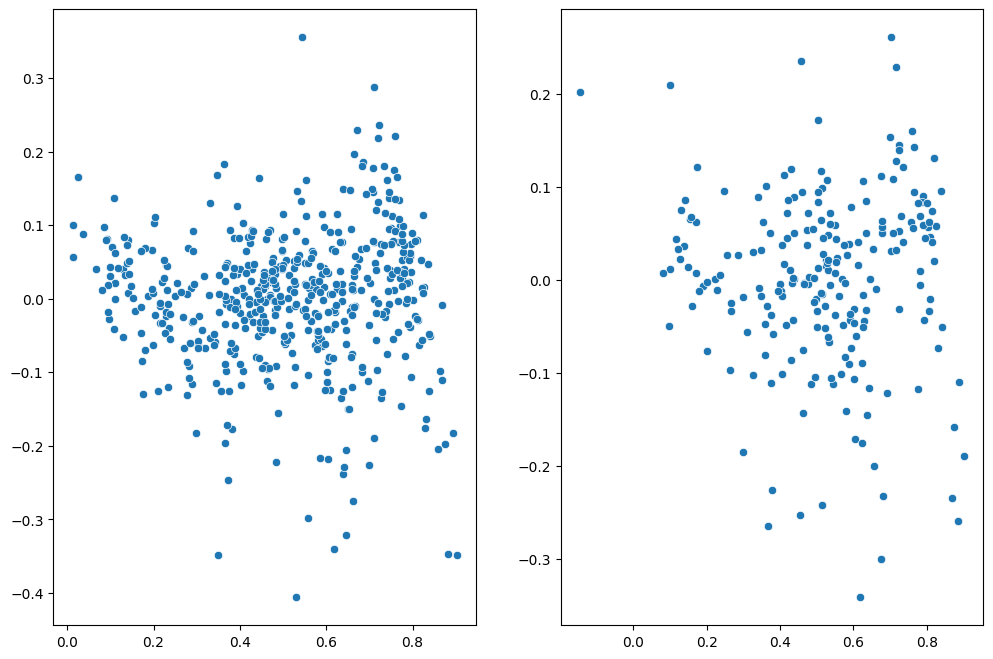

In [63]:
#Checking Homoscedasticity for train and test data
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
sns.scatterplot(y=y_train - y_train_pred4, x=y_train_pred4)
plt.subplot(1,2,2)
sns.scatterplot(y=y_test - y_test_pred_model4, x=y_test_pred_model4)
plt.show()

There is no clustering or pattern below or above 0.0 on the Y-axis.

This model is giving best results compared to other 6 models formed earlier while training

In [64]:
# Evaluating the Algorithm
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_test_pred_model4))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_test_pred_model4))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_model4)))


Mean Absolute Error: 0.07155033606898308
Mean Squared Error: 0.009199589322827929
Root Mean Squared Error: 0.0959144896396156


Text(0, 0.5, 'y_test_pred_model4')

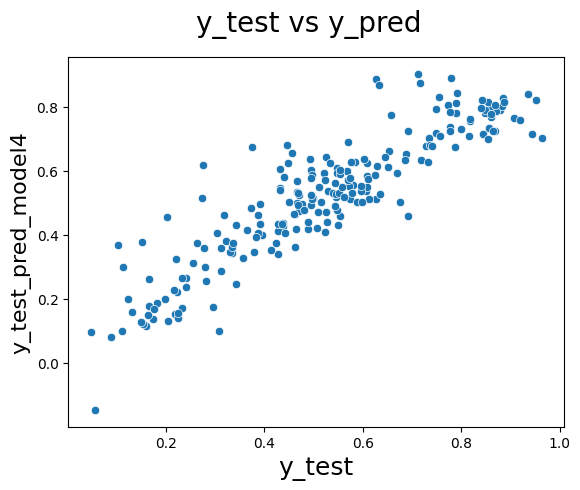

In [65]:
# understanding the spread.
fig = plt.figure()
# sns.scatterplot(y_test,y_test_pred_model4)
sns.scatterplot(x=y_test, y=y_test_pred_model4)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_test_pred_model4', fontsize=16)

In [66]:
print(lm_model4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     198.0
Date:                Wed, 13 Dec 2023   Prob (F-statistic):          1.51e-180
Time:                        20:10:04   Log-Likelihood:                 486.26
No. Observations:                 510   AIC:                            -946.5
Df Residuals:                     497   BIC:                            -891.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0543      0.049      1.110      0.2

In [67]:
lm_model4.params

const        0.054260
yr           0.231076
holiday     -0.081305
temp         0.495438
hum         -0.139439
windspeed   -0.182894
spring      -0.075228
summer       0.043272
winter       0.087014
Monday      -0.008324
Tuesday     -0.004898
GOOD         0.240191
NORMAL       0.187917
dtype: float64